In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
prod_df = pd.read_csv('./Historical Product Demand.csv')

In [3]:
prod_df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [4]:
prod_df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

#### We will start by changing the type of the date column to a datetime. Then we will change the type of the order_demand to int; although this should have done by pandas when importing the data so we will see if there are any other values in that column. Then we will analyze how many product categories there are and see if there is any way we can encode them.

In [5]:
prod_df.Date = pd.to_datetime(prod_df.Date)

In [6]:
prod_df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                object
dtype: object

In [7]:
prod_df.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013-09-27 00:00:00,1000
freq,16936,764447,481099,2075,112682
first,NaN,NaN,NaN,2011-01-08 00:00:00,NaN
last,NaN,NaN,NaN,2017-01-09 00:00:00,NaN


In [8]:
prod_df.Order_Demand.unique()

array(['100 ', '500 ', '50000 ', ..., '(3750)', '(191)', '28250 '],
      dtype=object)

#### It seems like there are some values that are in between parentheses.

In [17]:
clean_demand = prod_df.Order_Demand.str.extract('\(?(\d+)\)?')

In [23]:
pd.concat([clean_demand[0],prod_df.Order_Demand], axis=1).sample(50)

,0,Order_Demand
570784,100,100
593869,200,200
638776,10,10
667544,14000,14000
418522,36,36
534921,20000,20000
703415,5000,5000
705222,2500,2500
641761,2000,2000
687168,10000,10000


In [24]:
prod_df.Order_Demand = clean_demand[0].astype(int)

In [25]:
prod_df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object

In [26]:
prod_df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


In [28]:
prod_df.Product_Category.unique()

array(['Category_028', 'Category_006', 'Category_001', 'Category_019',
       'Category_005', 'Category_030', 'Category_032', 'Category_011',
       'Category_033', 'Category_007', 'Category_015', 'Category_021',
       'Category_024', 'Category_026', 'Category_023', 'Category_022',
       'Category_009', 'Category_003', 'Category_004', 'Category_018',
       'Category_020', 'Category_013', 'Category_008', 'Category_017',
       'Category_031', 'Category_025', 'Category_010', 'Category_029',
       'Category_012', 'Category_002', 'Category_014', 'Category_027',
       'Category_016'], dtype=object)

In [29]:
prod_df.Warehouse.unique()

array(['Whse_J', 'Whse_S', 'Whse_C', 'Whse_A'], dtype=object)

In [33]:
prod_df.Product_Code.nunique()

2160

In [34]:
prod_df.Product_Code.value_counts()

Product_1359    16936
Product_1295    10575
Product_1378     9770
Product_0620     9428
Product_1286     8888
Product_1382     8619
Product_1453     8503
Product_1294     8384
Product_1377     7872
Product_1287     7829
Product_1274     7048
Product_1016     6571
Product_1248     6348
Product_0613     6079
Product_1241     5476
Product_1456     5442
Product_1470     5159
Product_0031     5035
Product_1410     4995
Product_0608     4803
Product_1360     4801
Product_1451     4703
Product_1250     4655
Product_1381     4583
Product_1264     4523
Product_0033     4479
Product_1262     4478
Product_1452     4462
Product_1023     4381
Product_1463     4331
                ...  
Product_0647       11
Product_1595       11
Product_1793       10
Product_1619       10
Product_0237       10
Product_1525        9
Product_1915        9
Product_0360        8
Product_0244        7
Product_0240        7
Product_2009        7
Product_0577        7
Product_1019        7
Product_0438        6
Product_03

#### Product 1359 has the largest sample pool; therefore that is the one I will focus on. I will drop all the other rows.

In [35]:
undesired_index = prod_df[prod_df.Product_Code != 'Product_1359'].index
prod_df.drop(undesired_index, inplace=True)

In [36]:
prod_df.Product_Code.unique()

array(['Product_1359'], dtype=object)

In [38]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16936 entries, 276 to 1046518
Data columns (total 5 columns):
Product_Code        16936 non-null object
Warehouse           16936 non-null object
Product_Category    16936 non-null object
Date                16936 non-null datetime64[ns]
Order_Demand        16936 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 793.9+ KB


#### Let's plot the Order_Demand against the Date and see if we notice any patterns.

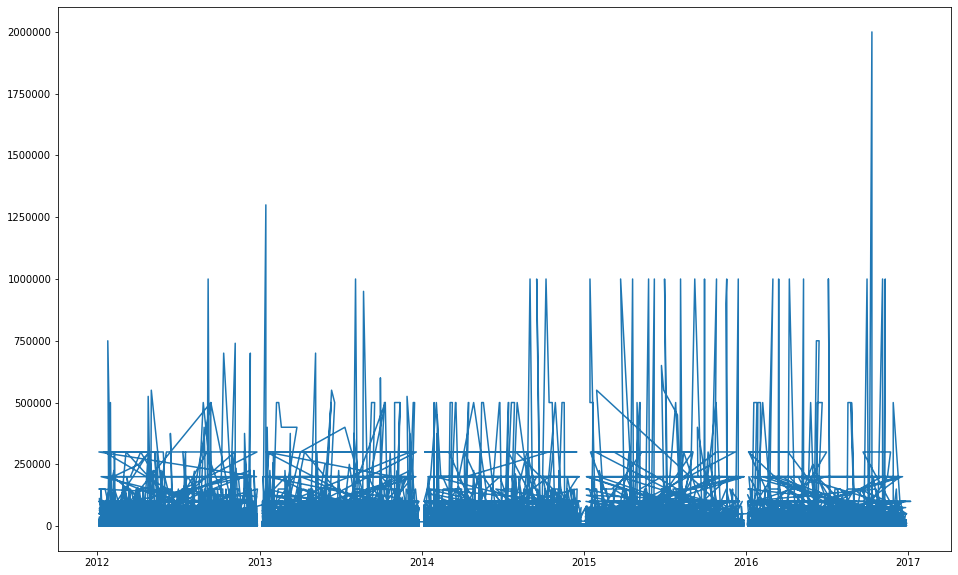

In [42]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
ax.plot(prod_df.Date, prod_df.Order_Demand)

#### This doesn't really make a lot of sense, maybe it's because we did not group the variables.

In [43]:
prod_df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
276,Product_1359,Whse_J,Category_019,2012-04-18,80000
282,Product_1359,Whse_J,Category_019,2012-05-21,70000
289,Product_1359,Whse_J,Category_019,2012-06-26,80000
292,Product_1359,Whse_J,Category_019,2012-07-17,100000
296,Product_1359,Whse_J,Category_019,2012-08-24,100000


#### Lets reset the index since we can do it right now too.

In [45]:
prod_df.reset_index(inplace=True)

In [49]:
prod_df.Date = pd.to_datetime(prod_df.Date, unit='s')

In [50]:
prod_df.dtypes

index                        int64
Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object

<BarContainer object of 16936 artists>

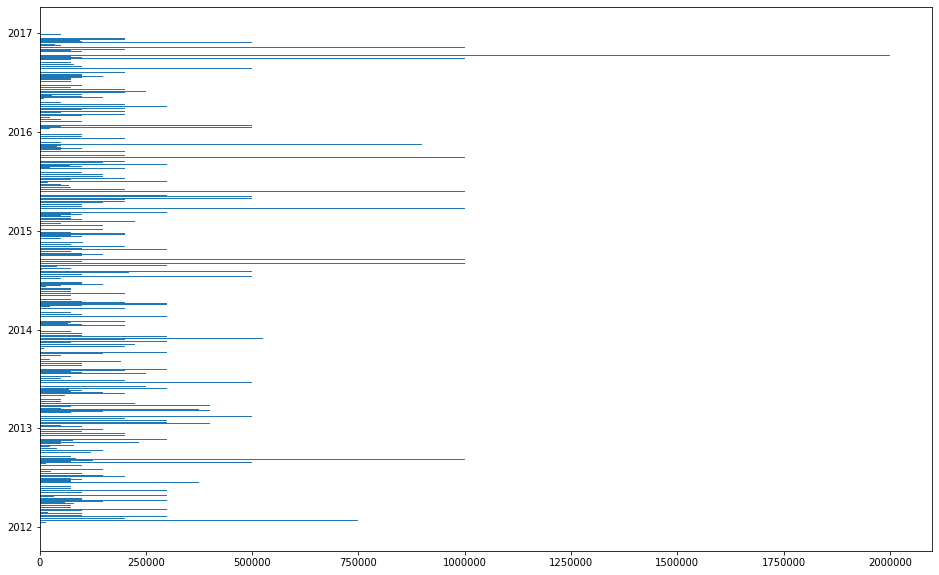

In [58]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
ax.barh(prod_df.Date, prod_df.Order_Demand)

#### From this graph we can see that there seems to be some seasonality. The largest orders appear towards the second half of the year (maybe December?) and also around New Years the orders go down really fast. Let's add the orders by date and see if this gives us any new information

In [62]:
groupedsum_df = prod_df.groupby(['Date']).sum()
groupedsum_df.reset_index(inplace=True)
groupedsum_df.drop(columns='index',inplace=True)
groupedsum_df.head()

,Date,Order_Demand
0,2012-01-05,702000
1,2012-01-06,676000
2,2012-01-10,783000
3,2012-01-11,200000
4,2012-01-12,284000


In [90]:
groupedmean_df = prod_df.groupby(['Date']).mean()
groupedmean_df.reset_index(inplace=True)
groupedmean_df.drop(columns='index',inplace=True)
groupedmean_df.head()

,Date,Order_Demand
0,2012-01-05,43875.000000
1,2012-01-06,33800.000000
2,2012-01-10,32625.000000
3,2012-01-11,10000.000000
4,2012-01-12,16705.882353


In [74]:
groupedcount_df = prod_df[['Date','Order_Demand']].groupby(['Date']).count()
groupedcount_df.reset_index(inplace=True)
groupedcount_df.head()

,Date,Order_Demand
0,2012-01-05,16
1,2012-01-06,20
2,2012-01-10,24
3,2012-01-11,20
4,2012-01-12,17


Text(0.5, 0.98, 'Grouped By Sums')

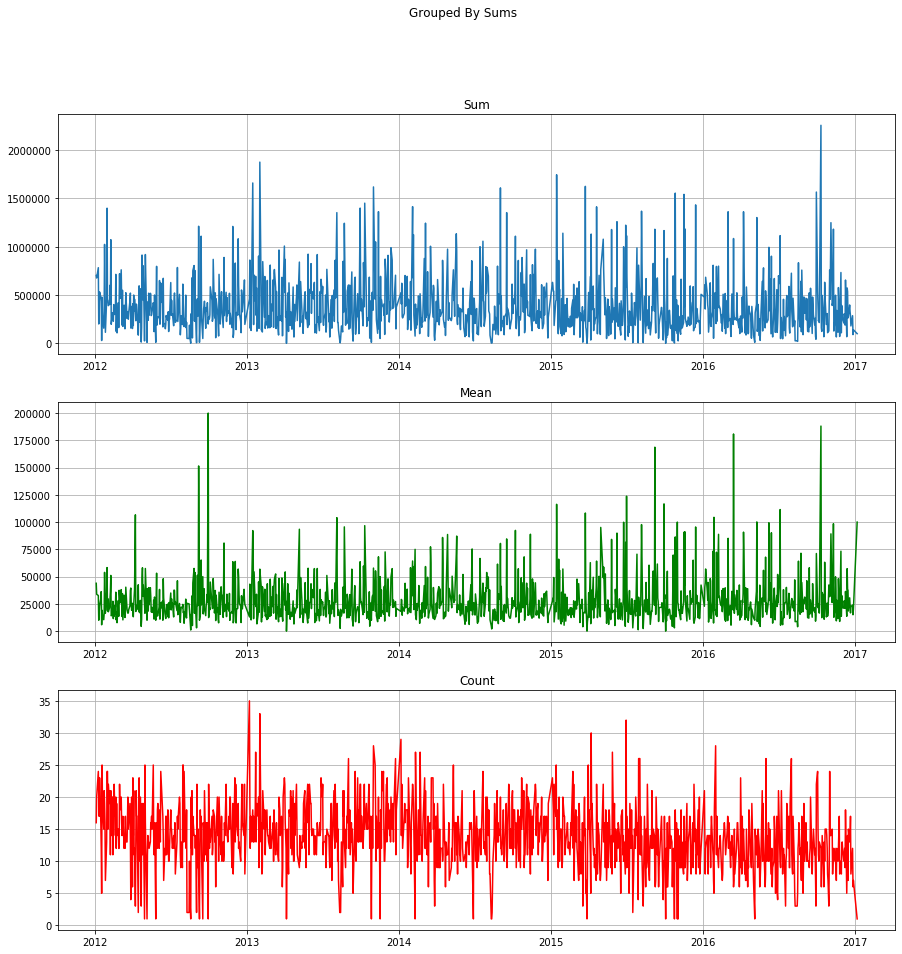

In [91]:
fig, ax = plt.subplots(3,1, figsize=(15,15))
ax[0].plot(groupedsum_df.Date, groupedsum_df.Order_Demand)
ax[0].set_title('Sum')
ax[0].grid(True)

ax[1].plot(groupedmean_df.Date, groupedmean_df.Order_Demand,color='g')
ax[1].set_title('Mean')
ax[1].grid(True)

ax[2].plot(groupedcount_df.Date, groupedcount_df.Order_Demand,color='r')
ax[2].set_title('Count')
ax[2].grid(True)

fig.suptitle('Grouped By Sums')

#### The graphs do not show any sort of seasonality. If anything it seems that the a huge amount of the sales for this product happen at the beginning and end of the year. Also, there was a large decrease in sales numbers towards the beginning of 2017. However, the Count graph does show that there is a slow but continue decrease in the sales of this specific product.

In [81]:
prod_df.sort_values(by='Date',inplace=True)
prod_df.reset_index()

#### The data was unsorted; therefore, we sorted it to fix the crazy line graph that we obtained before

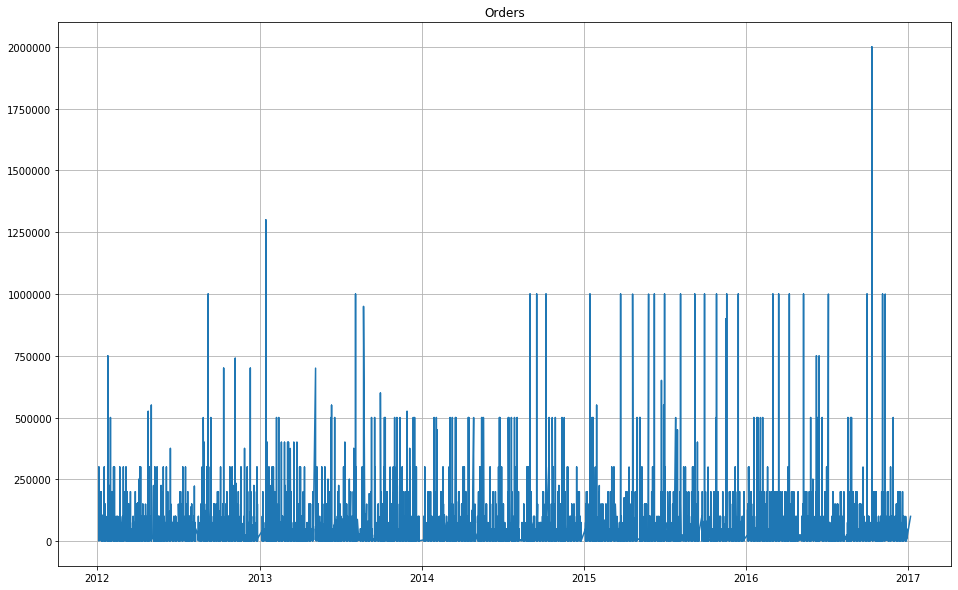

In [85]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
ax.plot(prod_df.Date, prod_df.Order_Demand)
ax.set_title('Orders')
ax.grid(True)

Text(0.5, 1.0, 'Orders')

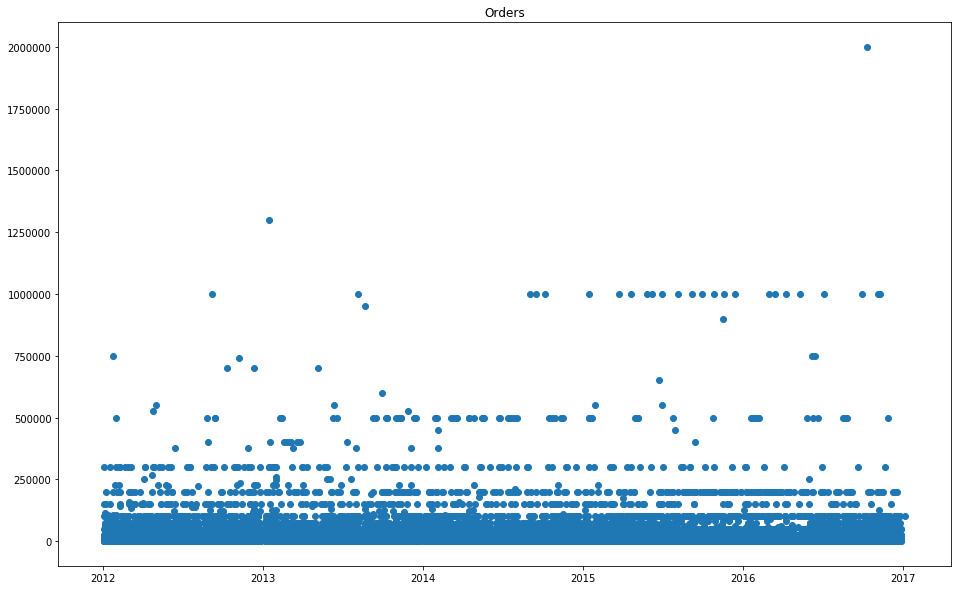

In [224]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
ax.scatter(prod_df.Date, prod_df.Order_Demand)
ax.set_title('Orders')


#### Next step I want to take: add colors to each graph that indicate the warehouse they come from as well as the product_code

In [92]:
groupedsumware_df = prod_df.groupby(['Date','Warehouse']).sum()
groupedsumware_df.reset_index(inplace=True)
groupedsumware_df.drop(columns='index',inplace=True)
groupedsumware_df.head()

,Date,Warehouse,Order_Demand
0,2012-01-05,Whse_J,702000
1,2012-01-06,Whse_J,676000
2,2012-01-10,Whse_J,783000
3,2012-01-11,Whse_J,200000
4,2012-01-12,Whse_J,284000


In [93]:
prod_df.Warehouse.unique()

array(['Whse_J'], dtype=object)

#### There is only one possible Warehouse; therefore there is no need to have that column in there. Let's see if the product_code helps us a bit more

In [95]:
prod_df.Product_Code.unique()

array(['Product_1359'], dtype=object)

#### There is only one possible product_code; therefore, this column doesn't become a too important feature.

#### We will split the date column into three columns (year, month and day) so that LinearRegression can handle it.

In [106]:
prod_df['year'] = prod_df.Date.dt.year
prod_df['month'] = prod_df.Date.dt.month
prod_df['day'] = prod_df.Date.dt.day

In [107]:
prod_df.head()

,index,Product_Code,Warehouse,Product_Category,Date,Order_Demand,year,month,day
2465,59646,Product_1359,Whse_J,Category_019,2012-01-05,1000,2012,1,5
2671,63099,Product_1359,Whse_J,Category_019,2012-01-05,5000,2012,1,5
38,2577,Product_1359,Whse_J,Category_019,2012-01-05,2000,2012,1,5
1435,32610,Product_1359,Whse_J,Category_019,2012-01-05,10000,2012,1,5
1745,46739,Product_1359,Whse_J,Category_019,2012-01-05,5000,2012,1,5


#### Let's start testing a basic algorithm such as a linear regression and see how that performs.

In [97]:
from sklearn.linear_model import LinearRegression

In [160]:
prodcopy_df = prod_df.copy()
prodcopy_df.drop(columns=['Warehouse','Product_Code'],index=1,inplace=True)
train_df = prodcopy_df.sample(frac=0.75,random_state=0)
test_df = prodcopy_df.drop(train_df.index)
train_df.sort_values(by='Date',inplace=True)
train_df.reset_index(drop=False,inplace=True)
test_df.sort_values(by='Date',inplace=True)
test_df.reset_index(drop=False,inplace=True)

In [161]:
train_df.head()

,index,Product_Category,Date,Order_Demand,year,month,day
0,806,Category_019,2012-01-05,300000,2012,1,5
1,3614,Category_019,2012-01-05,2000,2012,1,5
2,2671,Category_019,2012-01-05,5000,2012,1,5
3,1218,Category_019,2012-01-05,50000,2012,1,5
4,1745,Category_019,2012-01-05,5000,2012,1,5


In [162]:
test_df.head()

,index,Product_Category,Date,Order_Demand,year,month,day
0,38,Category_019,2012-01-05,2000,2012,1,5
1,1435,Category_019,2012-01-05,10000,2012,1,5
2,421,Category_019,2012-01-05,100000,2012,1,5
3,2665,Category_019,2012-01-05,16000,2012,1,5
4,3252,Category_019,2012-01-06,5000,2012,1,6


In [237]:
train_X = train_df[['year','month','day']]
train_Y = train_df.Order_Demand
test_X = test_df[['year','month','day']]
test_Y = test_df.Order_Demand

In [238]:
print(train_X.values.reshape(-1,3).shape)
print(train_Y.values.reshape(-1,1).shape)
print(test_X.values.reshape(-1,3).shape)
print(test_Y.values.reshape(-1,1).shape)

(924, 3)
(924, 1)
(308, 3)
(308, 1)


In [239]:
linear_regressor = LinearRegression()
linear_regressor.fit(train_X.values.reshape(-1,3), train_Y.values.reshape(-1,1))
pred_Y = linear_regressor.predict(train_X.values.reshape(-1,3))

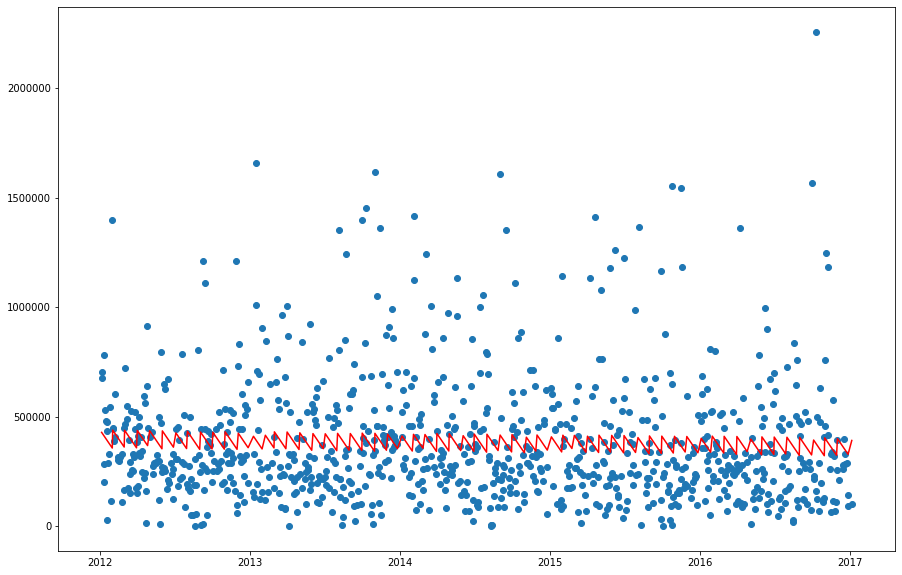

In [240]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(train_df.Date, train_Y)
ax.plot(train_df.Date, pred_Y.reshape(-1,), color='r')

#### Let's see how we perforrm on the grouped data by date

In [198]:
from sklearn.metrics import mean_squared_error, r2_score

In [231]:
linear_regressor.coef_

array([[-6836.70027642,  -853.00090551, -2754.84095315]])

#### However, the linear regression does not look too accurate. Let's see what its mean_squared_error looks like

In [248]:
print(train_Y.values.shape)
print(pred_Y.shape)

(924,)
(924, 1)


In [249]:
np.sqrt(mean_squared_error(train_Y.values.reshape(-1,1), pred_Y))

283496.65130304924

#### This score is pretty bad, let's try to find something else that might be more useful

In [250]:
from sklearn.ensemble import GradientBoostingRegressor

In [272]:
params = {
    'n_estimators': 13,
    'max_depth': 5,
    'learning_rate': 1,
    'criterion': 'mse'
}
gb_regressor = GradientBoostingRegressor(**params)
gb_regressor.fit(train_X,train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=13,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

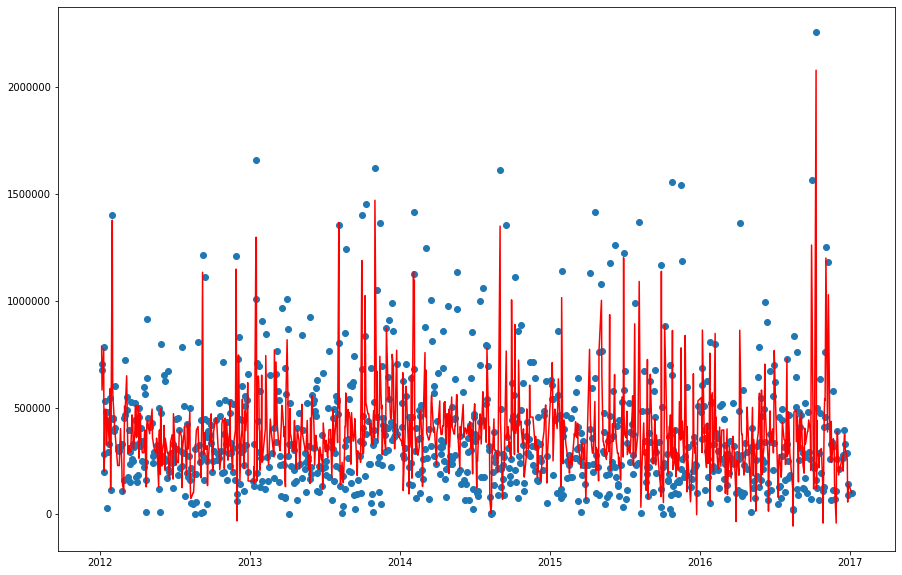

In [273]:
pred_Y = gb_regressor.predict(train_X)
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(train_df.Date, train_Y)
ax.plot(train_df.Date, pred_Y.reshape(-1,), color='r')

#### This graph looks much better than the one we obtained with linear regression

In [274]:
np.sqrt(mean_squared_error(train_Y.values.reshape(-1,1), pred_Y))

187021.36793130054

In [275]:
r2_score(train_Y.values.reshape(-1,1), pred_Y)

0.568450915100033

#### The scores are much better too; however, we hope that we did not overfit the model so let's try to predict over the test data.

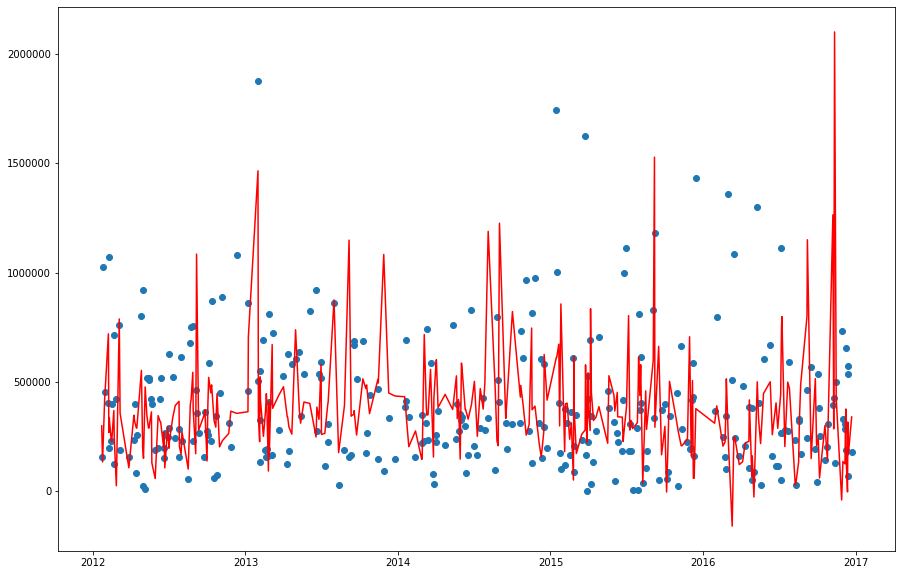

In [276]:
pred_Y = gb_regressor.predict(test_X)
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(test_df.Date, test_Y)
ax.plot(test_df.Date, pred_Y.reshape(-1,), color='r')

In [277]:
np.sqrt(mean_squared_error(test_Y.values.reshape(-1,1), pred_Y))

388803.25529726344

In [278]:
r2_score(test_Y.values.reshape(-1,1), pred_Y)

-0.6849926293338244

#### We end up with really low prediction accuracy which might be due to us overfitting the model.

### Summary of what I did in this project
Converted the date column to datetime type to make it simpler to extract data out of it. My original plan involved encoding the warehouse and product_code columns too. However, the project required to use only one product category. I chose the product category with the largest amount of rows to have enough data and this product category only had one product_code and one warehouse. Therefore, these features did not added any extra information to the model so I ended up dropping them.

Then I plotted the data and realized that the data was not sorted by the date so I proceeded to do that. Then I grouped the values by Date and look at the graphs of their sum, mean and count. These graphs did not really show any seasonality of any type. The only assumption I gained is that this particular product appeared to sell well during the beginning and ending of the year. 

Then I split the date column into three different columns: year, month and day. Then I proceeded to train a Linear Regressor with the data and obtained a mediocre result. Therefore, I chose a Gradient Boosting regressor and obtained a much better result. However, when predicting over unseen data the model performed pretty bad. Which might be due to some form of overfitting.